# **Análise da Geração Distribuída no Brasil**
<font size="5">**Data Visualization**</font>    
    
---
<p style='text-align: right;'> Por Henrique Leão </p> 

##  **1. Considerações Iniciais**

O presente Notebook tem como finalidade apresentar gráficamente os dados provenientes dos Scripts '1_Manipulando_Dados.py' e '2_Criando_DataFrames', dessa forma dando andamento ao estudo ao qual o projeto se propõe.

Essa parte do estudo contém:

* <font color=blue> Em desenvolvimento </font>
* <font color=blue> Em desenvolvimento </font>
* <font color=blue> Em desenvolvimento </font>

**Considerações:** 
    
1. O período análisado gráficamente tem inicio em 2012, coincidindo com a REN 482/2012.
    
2. Apesar da existência de dados anteriores a 2012 os mesmos tem baixa represetatividade para o estudo devido a sua proporção.

In [1]:
import pandas as pd
import numpy as np
#import matplotlib.dates as mdates
#import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

#import matplotlib.dates as mdates
#import matplotlib.cbook as cbook

import warnings
warnings.filterwarnings("ignore")

In [7]:
df_Base = pd.read_csv('../Output/DataFrame_Base.csv', sep = ';', encoding = 'utf-8')
df_Base['Data_Conexao'] = pd.to_datetime(df_Base['Data_Conexao'], format='%Y/%m/%d')

##  **2. Total de Conexões**

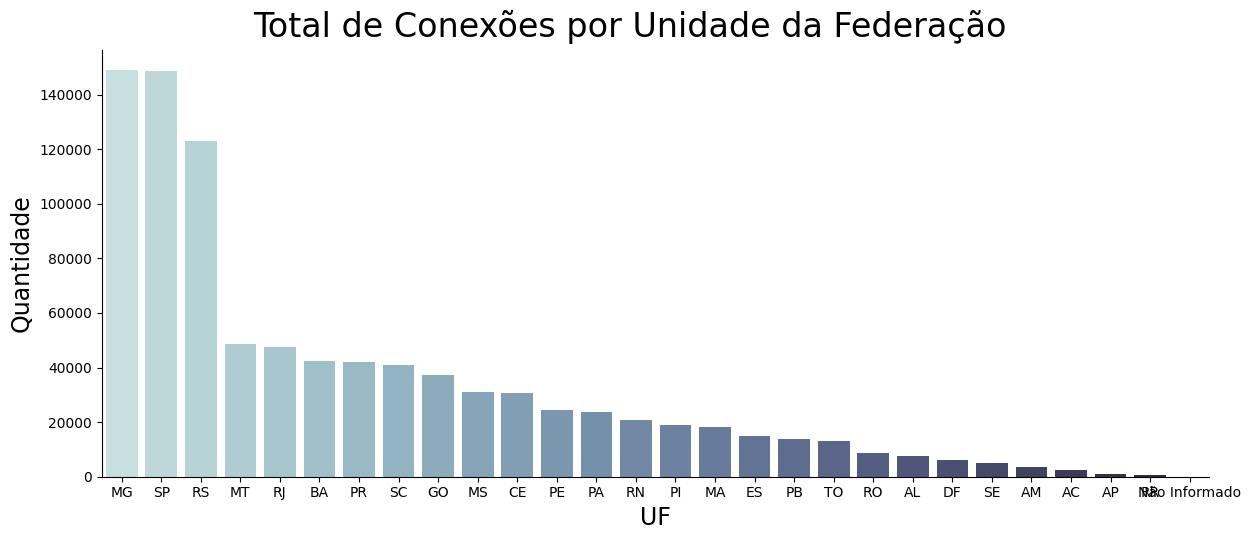

In [17]:
Grafico = sns.catplot(x = "UF", kind = "count", 
            data = df_Base.query('2012 <= Data_Conexao.dt.year <= 2022'), 
            aspect = 2.5, 
            palette = "ch:start=.2,rot=-.3", # 
            order = df_Base.UF.value_counts().index)

Grafico.fig.suptitle('Total de Conexões por Unidade da Federação', y = 1.05, fontsize = 24)
Grafico.set_xlabels('UF', fontsize = 17)
Grafico.set_ylabels('Quantidade', fontsize = 17)

##  **3. Potência Instalada**

<AxesSubplot:title={'center':'Potência Média Instalada po Tipo de Geração'}, xlabel='kW', ylabel='Tipo de Unidade Geradora'>

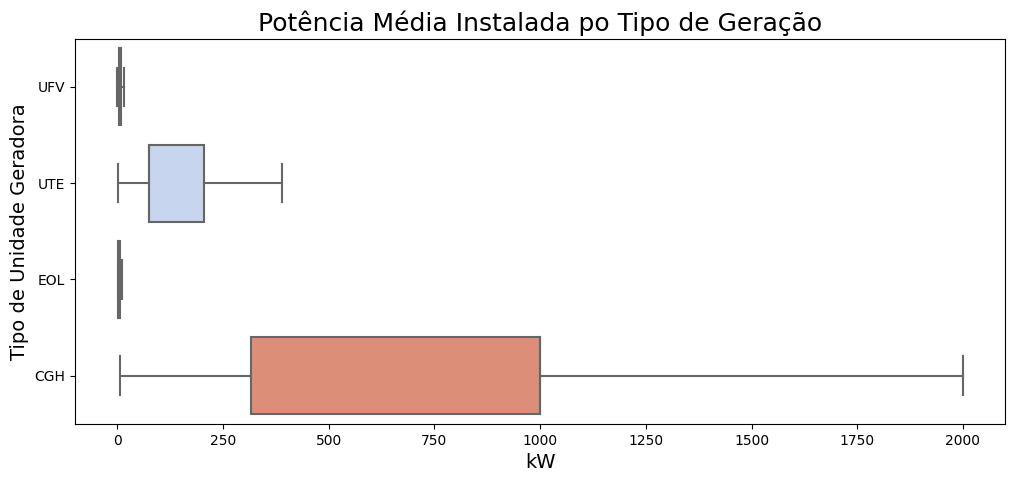

In [23]:
Grafico = sns.boxplot(x = 'Pot_Instalada_kW', y = 'Tipo_Geracao', 
                 data = df_Base.query('Data_Conexao.dt.year >= 2012'), 
                 orient = 'h',
                 showfliers = False,
                 palette = "coolwarm")
Grafico.figure.set_size_inches(12,5)
Grafico.set_title('Potência Média Instalada po Tipo de Geração', fontsize=18)
Grafico.set_xlabel('kW', fontsize=14)
Grafico.set_ylabel('Tipo de Unidade Geradora', fontsize=14)
Grafico

> O Art. 2º do Capítulo I da Resolução Normativa 482/2012 da ANEEL estabelece que **Microgeração Distribuída** são centrais geradoras com potência instalada menor ou igual a 75 kW, enquanto **Minigeração Distribuída** são as centrais geradoras com potência instalada superior a 75kW e com limite superior de 5MW (5.000 kW).
>
> Considerando os intervalos estabelecidos pela REN 482/2012, O Boxplot acima evidência a tendência a potência instalada pelo tipo de unidade geradora adotada.  
>
> É possível observar que a compressão dos boxplot referentes a unidades de geração fotovoltaica e eólica em valores muito baixos indicam que a tendência para esse tipo de geração ocorre na faixa que compreende o intervalor de unidades de microgeração, até 75 kW, e sua representatividade na faixa que compreende minigeradoras ocorre devido a dados discrepantes (outliers). 
>
> Unidades geradoras do tipo termoelétrica (UTE) e hidrelétrica (CGH) apresentam tendência no intervalor que compreende minigeradoras.

<AxesSubplot:title={'center':'Potência Média de Microgeradoras Fotovoltaíca e Eólica'}, xlabel='kW', ylabel='Tipo de Unidade Geradora'>

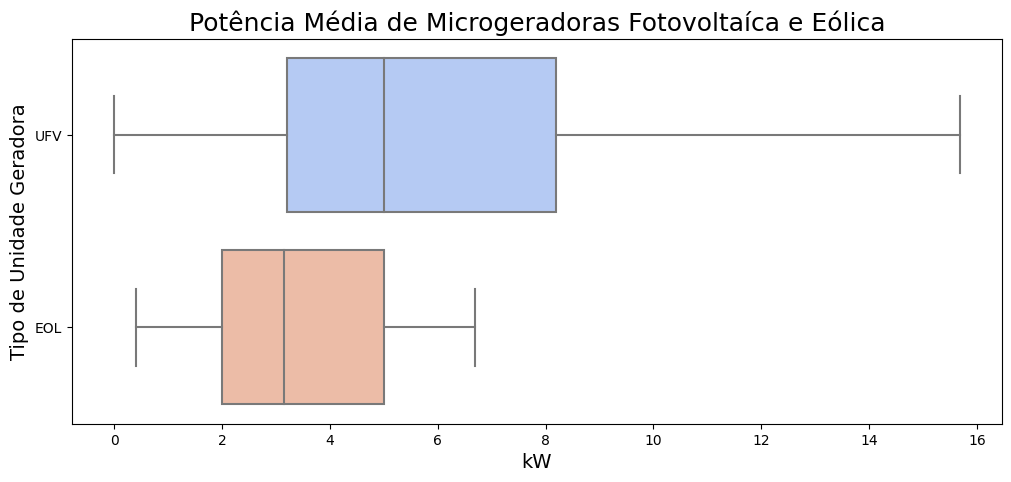

In [30]:
Grafico = sns.boxplot(x = 'Pot_Instalada_kW', y = 'Tipo_Geracao', 
                 data = df_Base.query('Data_Conexao.dt.year >= 2012 and Pot_Instalada_kW <= 75 and Tipo_Geracao == ["UFV", "EOL"]'),
                 orient = 'h',
                 showfliers=False,
                 palette = "coolwarm")
Grafico.figure.set_size_inches(12,5)
Grafico.set_title('Potência Média de Microgeradoras Fotovoltaíca e Eólica', fontsize=18)
Grafico.set_xlabel('kW', fontsize=14)
Grafico.set_ylabel('Tipo de Unidade Geradora', fontsize=14)
Grafico

> Restringindo os parâmetros para unidades de microgeração do tipo fotovoltaica e observando o comportamento das 4 princípais classes de consumo obtêm-se o seguinte gráfico:

<AxesSubplot:title={'center':'Potência Média Instalada de Geradoras Fotovoltaica'}, xlabel='kW', ylabel='Classe de Consumo'>

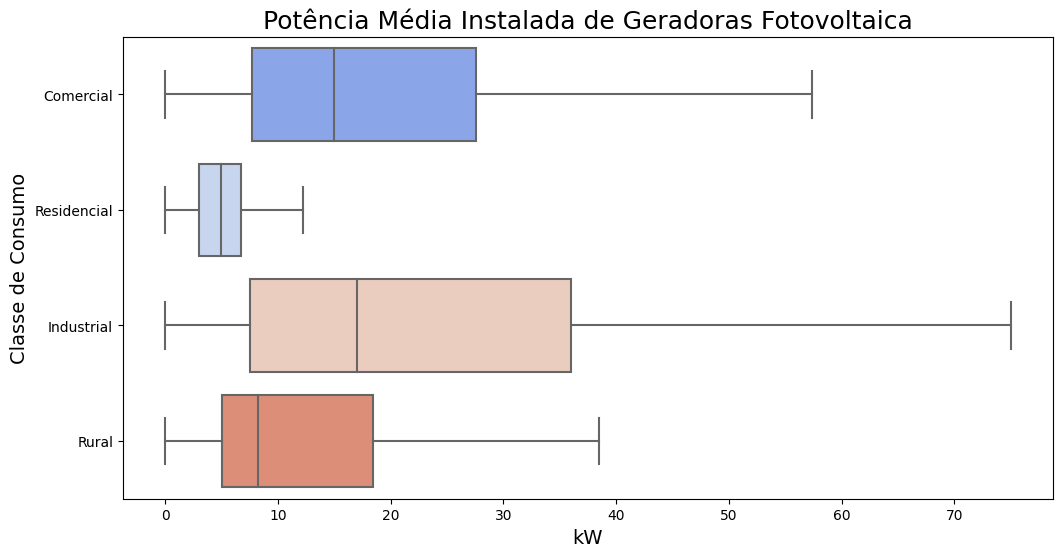

In [34]:
Grafico = sns.boxplot(x = 'Pot_Instalada_kW', y = 'Classe_Consumo',
                 data = df_Base.query('Data_Conexao.dt.year >= 2012 and Pot_Instalada_kW <= 75 and Tipo_Geracao == "UFV" and Classe_Consumo == ["Residencial", "Comercial", "Industrial", "Rural"]'), 
                 orient = 'h',
                 showfliers=False,
                 palette = "coolwarm")
Grafico.figure.set_size_inches(12,6)
Grafico.set_title('Potência Média Instalada de Geradoras Fotovoltaica', fontsize=18)
Grafico.set_xlabel('kW', fontsize=14)
Grafico.set_ylabel('Classe de Consumo', fontsize=14)
Grafico

In [40]:
def Mediana_Pot(Parametro):
      mediana = df_Base.query('Data_Conexao.dt.year >= 2012 and Pot_Instalada_kW <= 75 and Tipo_Geracao == "UFV" and Classe_Consumo == @Parametro').Pot_Instalada_kW.median()
      return mediana

print('Medianas do Boxplot: \n \nResidencial: %s kW\nComercial: %s kW\nRural: %s kW\nIndustrial: %s kW' % 
      (Mediana_Pot("Residencial"), Mediana_Pot("Comercial"), Mediana_Pot("Rural"), Mediana_Pot("Industrial")))

Medianas do Boxplot: 
 
Residencial: 4.92 kW
Comercial: 15.0 kW
Rural: 8.2 kW
Industrial: 17.0 kW


<AxesSubplot:title={'center':'Potência Média Instalada de Geradoras Fotovoltaica'}, xlabel='kW', ylabel='Classe de Consumo'>

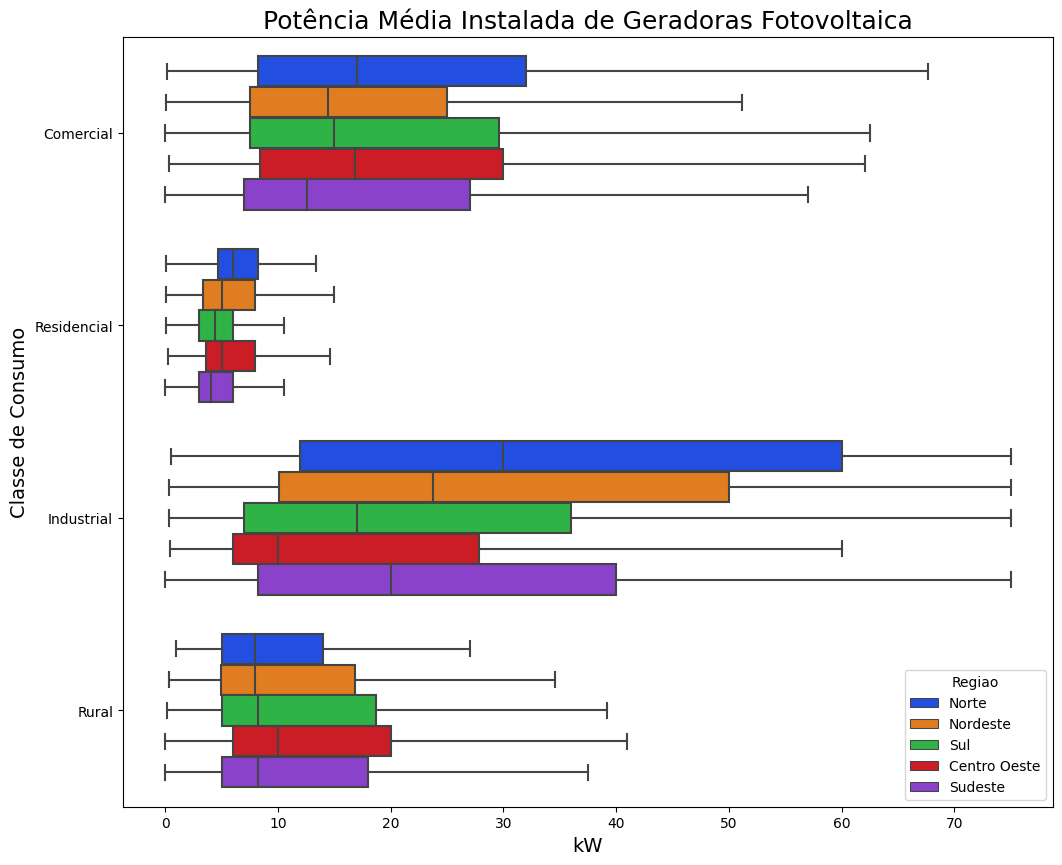

In [41]:
Grafico = sns.boxplot(x = 'Pot_Instalada_kW', y = 'Classe_Consumo', hue = 'Regiao',
                 data = df_Base.query('Data_Conexao.dt.year >= 2012 and Pot_Instalada_kW <= 75 and Tipo_Geracao == "UFV" and Classe_Consumo == ["Residencial", "Comercial", "Industrial", "Rural"]'), 
                 orient = 'h',
                 showfliers=False,
                 palette = "bright")
Grafico.figure.set_size_inches(12,10)
Grafico.set_title('Potência Média Instalada de Geradoras Fotovoltaica', fontsize=18)
Grafico.set_xlabel('kW', fontsize=14)
Grafico.set_ylabel('Classe de Consumo', fontsize=14)
Grafico